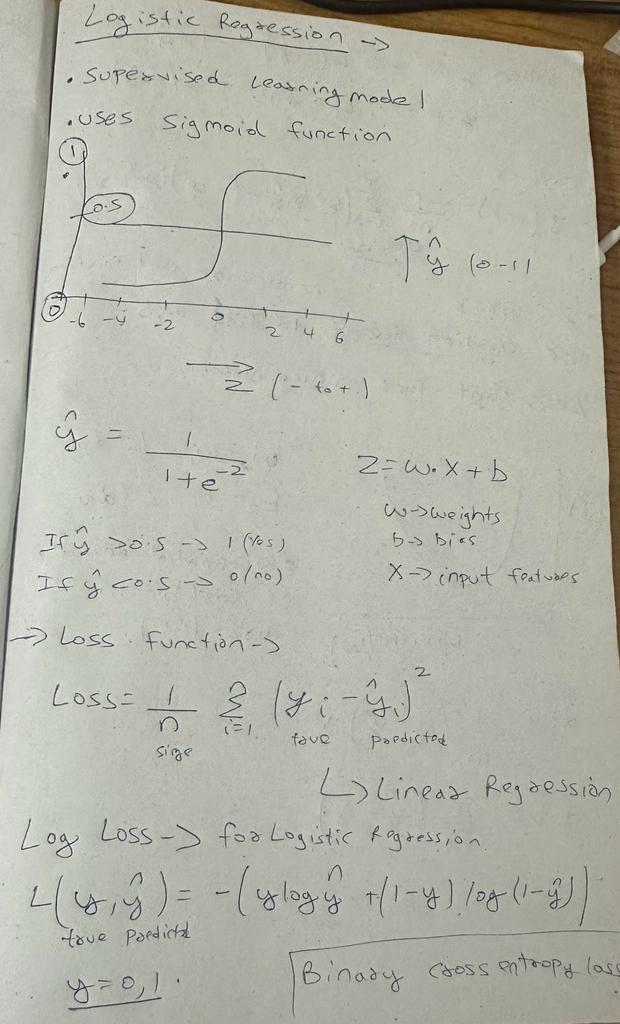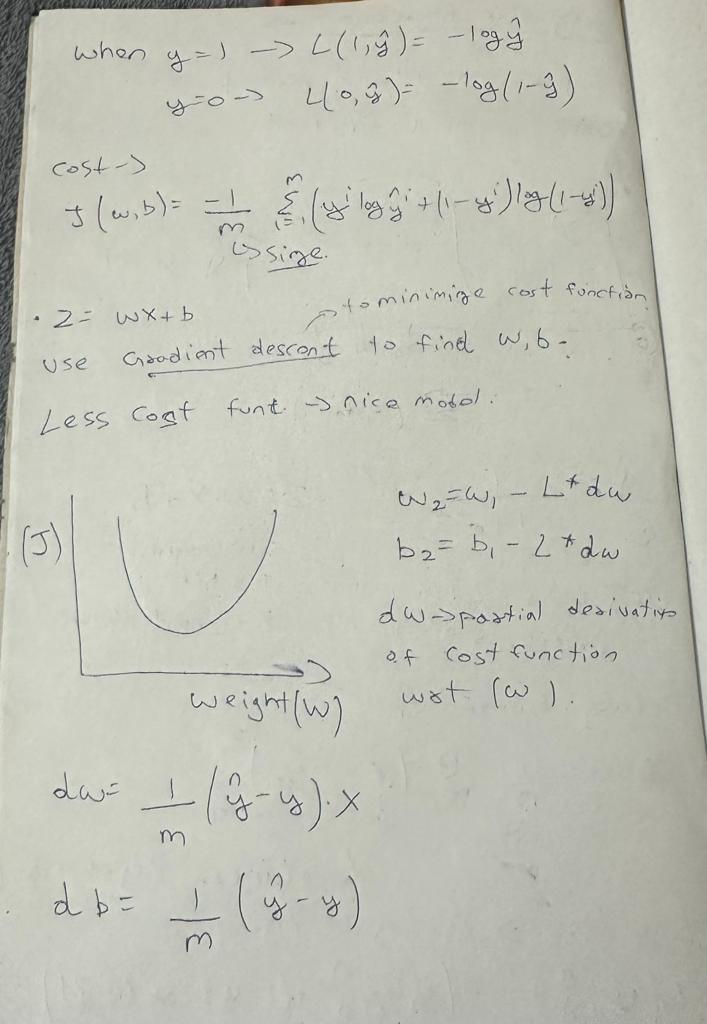

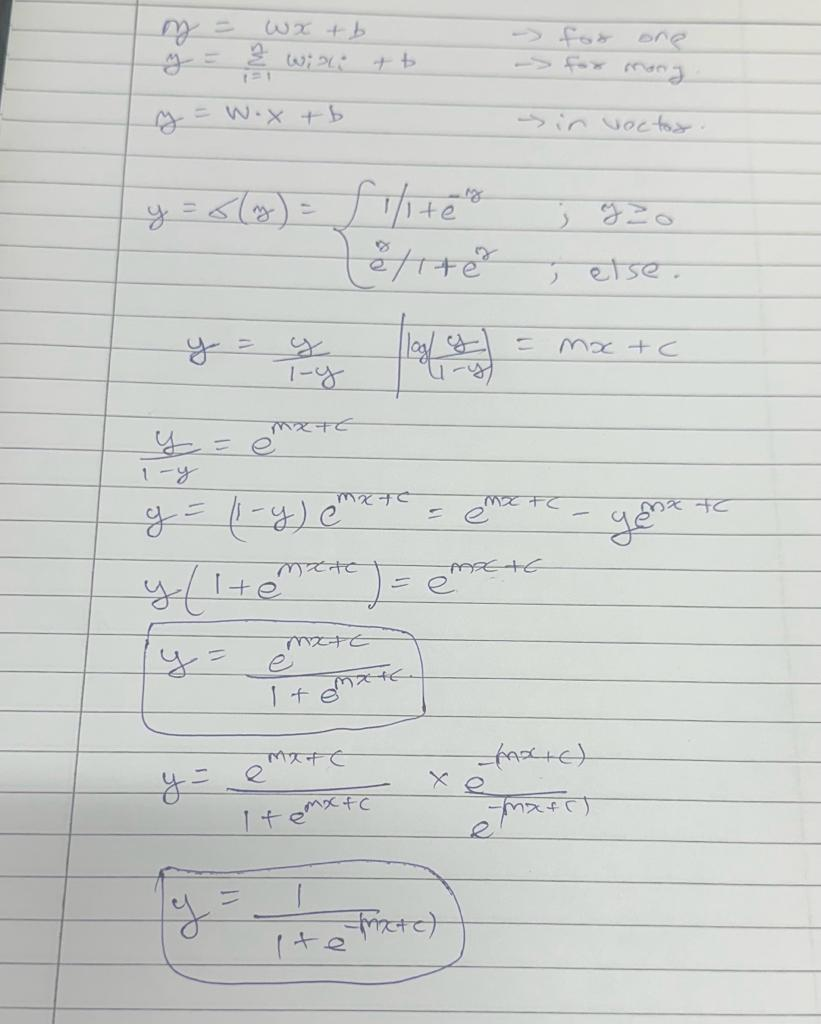

- called as sigmoid curve
- model to predict the probability of an event occurring based on the values of the predictor variables
- loss function measures how far an estimated value is from its true value
- estimated value is predicted value


1) scratch model

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/machine_learning/datasets/diabetes.csv')
df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


0 --> Non-Diabetic

1 --> Diabetic

In [3]:
class Logistic_Regression():


  # declaring learning rate & number of iterations (Hyperparametes)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  # fit function to train the model with dataset
  def fit(self, X, Y):

    # number of data points in the dataset (number of rows)  -->  m
    # number of input features in the dataset (number of columns)  --> n
    self.m, self.n = X.shape


    #initiating weight & bias value

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y


    # implementing Gradient Descent for Optimization

    for i in range(self.no_of_iterations):
      self.update_weights()



  def update_weights(self):

    # Y_hat formula (sigmoid function)

    Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))


    # derivaties

    dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))

    db = (1/self.m)*np.sum(Y_hat - self.Y)


    # updating the weights & bias using gradient descent

    self.w = self.w - self.learning_rate * dw

    self.b = self.b - self.learning_rate * db


  # Sigmoid Equation & Decision Boundary

  def predict(self, X):

    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) ))
    Y_pred = np.where( Y_pred > 0.5, 1, 0)
    return Y_pred

In [29]:
# Assume the target variable is named 'Outcome,' and the features are all other columns
X = df.drop('diabetes', axis=1)
Y = df['diabetes']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Initialize your logistic regression model with appropriate hyperparameters
learning_rate = 0.00005
no_of_iterations = 1000
logistic_regression_model = Logistic_Regression(learning_rate, no_of_iterations)

# Train the model on the training data
logistic_regression_model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = logistic_regression_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7788944723618091


In [14]:
# Print the input test values and predicted values for the test set
print("\nTest Set Predictions:")
for xi, y_true, y_pred in zip(X_test.values, Y_test.values, Y_pred):
    print(f"Input: {xi}, True: {y_true}, Predicted: {y_pred}")


Test Set Predictions:
Input: [40 65], True: 1, Predicted: 1
Input: [50 82], True: 0, Predicted: 1
Input: [50 90], True: 0, Predicted: 1
Input: [45 82], True: 1, Predicted: 1
Input: [50 85], True: 0, Predicted: 1
Input: [55 68], True: 1, Predicted: 1
Input: [55 68], True: 1, Predicted: 1
Input: [45 78], True: 1, Predicted: 1
Input: [60 63], True: 1, Predicted: 1
Input: [40 75], True: 1, Predicted: 1
Input: [40 73], True: 1, Predicted: 1
Input: [50 67], True: 1, Predicted: 1
Input: [45 68], True: 1, Predicted: 1
Input: [50 77], True: 1, Predicted: 1
Input: [45 83], True: 0, Predicted: 1
Input: [40 90], True: 0, Predicted: 0
Input: [45 77], True: 1, Predicted: 1
Input: [35 72], True: 1, Predicted: 1
Input: [50 65], True: 1, Predicted: 1
Input: [40 87], True: 0, Predicted: 1
Input: [50 92], True: 0, Predicted: 1
Input: [40 90], True: 0, Predicted: 0
Input: [45 83], True: 0, Predicted: 1
Input: [40 77], True: 1, Predicted: 1
Input: [45 85], True: 0, Predicted: 1
Input: [50 88], True: 0, Pr

2) sci-kit model

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/machine_learning/datasets/diabetes.csv')

X = df.drop('diabetes', axis=1)
Y = df['diabetes']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the scikit-learn logistic regression model
logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression_model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = logistic_regression_model.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")



Accuracy: 0.9296482412060302


In [8]:
print("\nTest Set Predictions:")
for xi, y_true, y_pred in zip(X_test.values, Y_test.values, Y_pred):
    print(f"Input: {xi}, True: {y_true}, Predicted: {y_pred}")


Test Set Predictions:
Input: [40 70], True: 1, Predicted: 1
Input: [40 75], True: 1, Predicted: 1
Input: [45 65], True: 1, Predicted: 1
Input: [45 93], True: 0, Predicted: 0
Input: [45 88], True: 0, Predicted: 0
Input: [40 85], True: 0, Predicted: 0
Input: [40 75], True: 1, Predicted: 1
Input: [40 85], True: 1, Predicted: 0
Input: [40 87], True: 0, Predicted: 0
Input: [50 73], True: 1, Predicted: 1
Input: [50 92], True: 0, Predicted: 0
Input: [45 82], True: 0, Predicted: 0
Input: [45 93], True: 0, Predicted: 0
Input: [45 80], True: 0, Predicted: 0
Input: [45 93], True: 0, Predicted: 0
Input: [55 70], True: 1, Predicted: 1
Input: [45 77], True: 0, Predicted: 1
Input: [60 65], True: 1, Predicted: 1
Input: [40 73], True: 1, Predicted: 1
Input: [45 92], True: 0, Predicted: 0
Input: [45 83], True: 1, Predicted: 0
Input: [40 68], True: 1, Predicted: 1
Input: [60 75], True: 1, Predicted: 1
Input: [45 88], True: 0, Predicted: 0
Input: [40 88], True: 0, Predicted: 0
Input: [45 97], True: 0, Pr